##Installing Necessary Libraries

In [ ]:
# Libraries
!pip install spellchecker
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966499 sha256=2f4eebd0f003499f703339413697a254aa330a52e6d84f051af1ca54dd4aab83
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7123 sha256=7f60f7b66a23f6f8c81e0d734bba53070b5fc57cbb597bba153324e47e2e6baa
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8466 sha256=ee3dd28fcb2d6f3e25c356ae80eda07056b77037261a6f066a4bf9c304cf35f0
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c77

In [ ]:
# Import Data Preprocessing and Wrangling libraries
import re
from tqdm.notebook import tqdm
import pandas as pd
from datetime import datetime
import dateutil.parser

# Import NLP Libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# Import Visualization Libraries
import plotly.offline as pyo
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
from IPython.display import IFrame
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Downloading peripherals
nltk.download('vader_lexicon')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Set the file path
file_path = '/content/chatgpt_daily_tweets.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Print the DataFrame
df.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count
0,1.64E+18,2023-04-03 13:59:44+00:00,07:02.5,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,ในใจJacksonwang,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,NaN,13640.0,0.0,0.0,0.0
1,1.64E+18,2023-04-03 10:59:22+00:00,06:59.4,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,ミミズクりんゆ,DRVO_Project,東京←岐阜,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,NaN,0.0,0.0,0.0,290.0
2,1.64E+18,2023-04-03 03:59:28+00:00,06:52.5,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,NaN,628.0,0.0,0.0,0.0
3,1.64E+18,2023-04-03 15:59:59+00:00,07:04.7,Get an intelligent chatbot for your website in...,en,1.63304E+18,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,NaN,0.0,0.0,0.0,58.0
4,1.64E+18,2023-04-03 01:59:25+00:00,06:50.6,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1.3114E+18,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,NaN,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42003 entries, 0 to 42002
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              42003 non-null  object 
 1   tweet_created         42003 non-null  object 
 2   tweet_extracted       42003 non-null  object 
 3   text                  42003 non-null  object 
 4   lang                  42003 non-null  object 
 5   user_id               42003 non-null  object 
 6   user_name             41998 non-null  object 
 7   user_username         42003 non-null  object 
 8   user_location         24929 non-null  object 
 9   user_description      35575 non-null  object 
 10  user_created          41998 non-null  object 
 11  user_followers_count  41995 non-null  float64
 12  user_following_count  41995 non-null  float64
 13  user_tweet_count      41995 non-null  float64
 14  user_verified         41995 non-null  object 
 15  source             

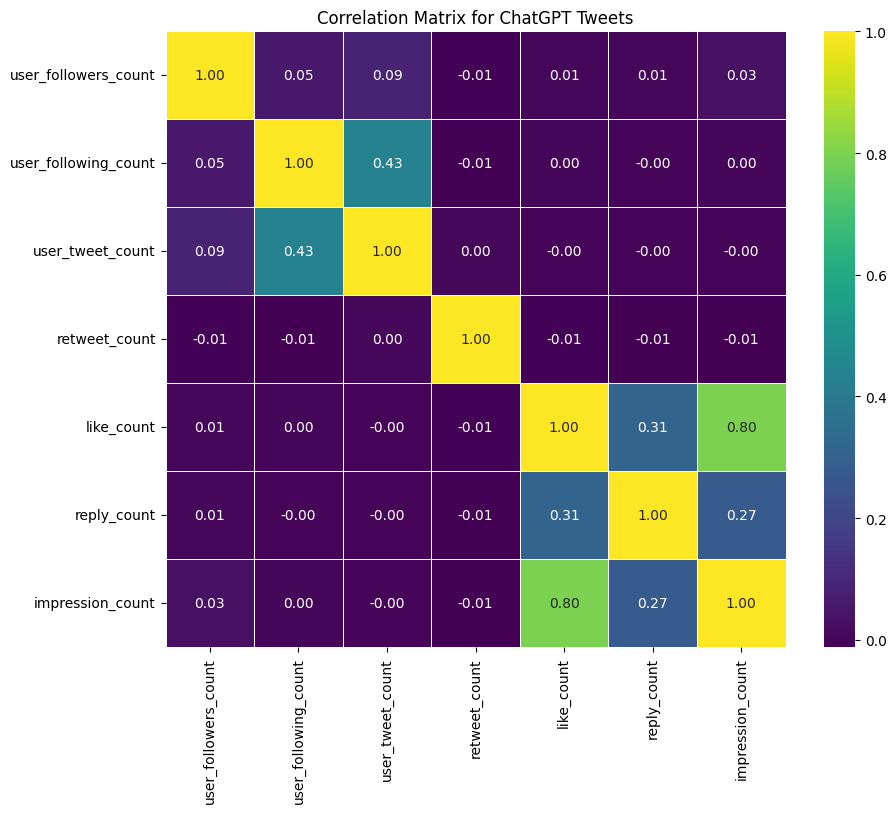

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame variable is named 'df'

# Select the columns for the correlation matrix
columns = ['user_followers_count', 'user_following_count', 'user_tweet_count', 'retweet_count', 'like_count', 'reply_count', 'impression_count']

# Create a subset of the DataFrame with selected columns
subset_df = df[columns]

# Compute the correlation matrix
corr_matrix = subset_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for ChatGPT Tweets")
plt.show()

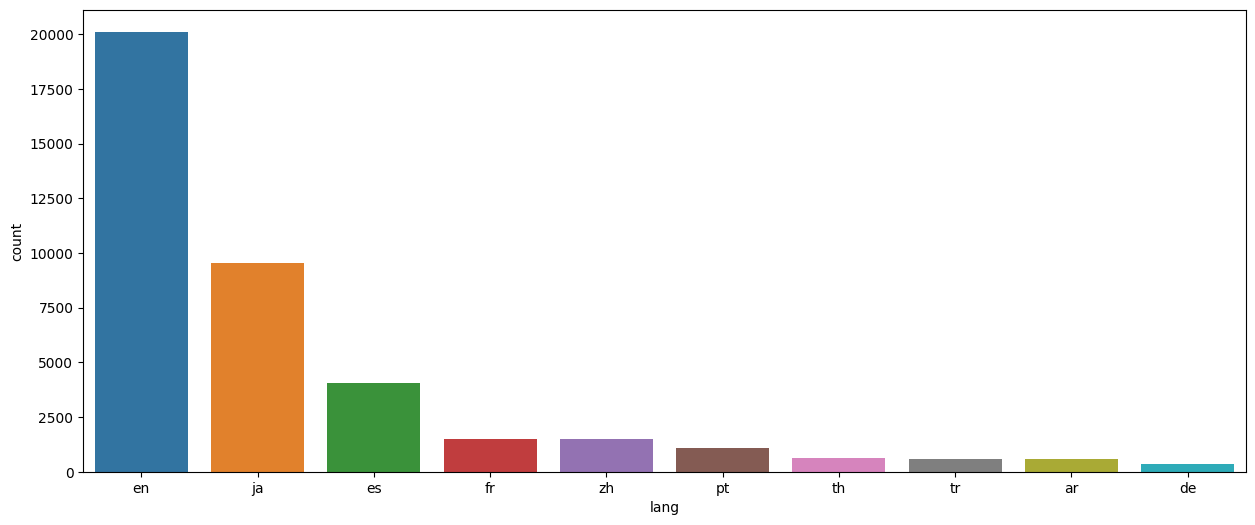

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='lang', order=df["lang"].value_counts().index[:10])
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

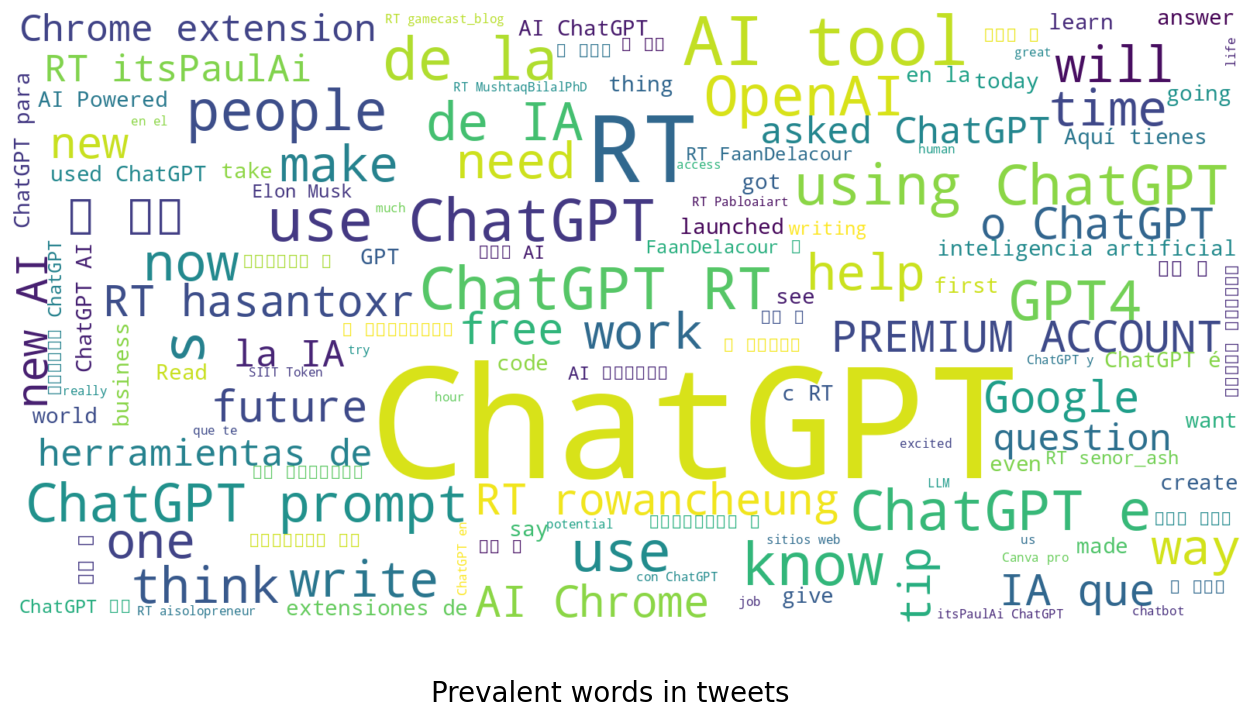

In [ ]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

In [ ]:
print(df.sort_values('tweet_created')['tweet_created'])

40106    2011-02-28 04:00:30+00:00
13105    2012-12-11 13:04:31+00:00
14897    2016-08-19 14:49:46+00:00
295      2023-04-03 00:59:14+00:00
745      2023-04-03 00:59:15+00:00
                   ...            
41851    2023-05-11 23:59:53+00:00
41228    2023-05-11 23:59:53+00:00
41703    2023-05-11 23:59:53+00:00
41418    2023-05-11 23:59:57+00:00
41604    2023-05-11 23:59:58+00:00
Name: tweet_created, Length: 42003, dtype: object


In [ ]:
#Drop the source column
df.drop(columns=['source'], inplace=True)

In [ ]:
#Data Preprocessing
df.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,user_created,user_followers_count,user_following_count,user_tweet_count,user_verified,retweet_count,like_count,reply_count,impression_count
0,1.64E+18,2023-04-03 13:59:44+00:00,07:02.5,RT @jexep: เทคนิคฝึกภาษากับ ChatGPT ที่ผมลอง (...,th,4706577259,👷🏼 ♡ #GOT7,BPawarisa1a,ในใจJacksonwang,@JacksonWang852 ➖ รีวิว #รีวิวแบมพี #แบมพีอัพเ...,2016-01-04 02:27:33+00:00,1293.0,445.0,87051.0,False,13640.0,0.0,0.0,0.0
1,1.64E+18,2023-04-03 10:59:22+00:00,06:59.4,ChatGPTをもっと活かせるChrome拡張機能4選 https://t.co/hfacF...,ja,2264288640,ミミズクりんゆ,DRVO_Project,東京←岐阜,料理垢です。ｳｪｯﾌﾞ4年目 発言はファッキン個人の見解 TypeScript/Vue/Re...,2013-12-27 12:39:07+00:00,7878.0,4941.0,76597.0,False,0.0,0.0,0.0,290.0
2,1.64E+18,2023-04-03 03:59:28+00:00,06:52.5,RT @DarrellLerner: ChatGPT Plugins are the fas...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,2014-03-11 06:04:10+00:00,269.0,4141.0,3816.0,False,628.0,0.0,0.0,0.0
3,1.64E+18,2023-04-03 15:59:59+00:00,07:04.7,Get an intelligent chatbot for your website in...,en,1.63304E+18,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,2023-03-07 09:43:36+00:00,264.0,24.0,198.0,False,0.0,0.0,0.0,58.0
4,1.64E+18,2023-04-03 01:59:25+00:00,06:50.6,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",en,1.3114E+18,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,2020-09-30 20:32:00+00:00,447.0,419.0,12949.0,False,0.0,0.0,0.0,0.0


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from spellchecker import SpellChecker
import plotly.offline as pyo

# Initialize tools
sns.set_style('darkgrid')
sia = SIA()
spell = SpellChecker()
pyo.init_notebook_mode()

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

##Data Preprocessing

In [ ]:
data = df.copy()
data['original_tweet'] = df['text']
data['datetime'] = data['tweet_created']
data['datetime'] = data.datetime.apply(lambda x: dateutil.parser.parse(x))
rt_mask = data.text.apply(lambda x: "RT @" in x)

# Standard tweet preprocessing
data.text = data.text.str.lower()
data.text = data.text.apply(lambda x: re.sub('@[^\s]+', '', x))  # Remove twitter handlers
data.text = data.text.apply(lambda x: re.sub(r'\B#\S+', '', x))  # Remove hashtags
data.text = data.text.apply(lambda x: re.sub(r"http\S+", "", x))  # Remove URLs
data.text = data.text.apply(lambda x: ' '.join(re.findall(r'\w+', x)))  # Remove all special characters
data.text = data.text.apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', '', x))  # Remove all single characters
data.text = data.text.apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I))  # Substitutispaces with sing multiple ngle space

# Convert the 'date' column to datetime format and remove the timezone information
data['datetime'] = pd.to_datetime(data['datetime']).dt.tz_localize(None)

# Filter tweets in English
data = data[data['lang'] == 'en']

# Viewing the preprocessed data
data.head()

,tweet_id,tweet_created,tweet_extracted,text,lang,user_id,user_name,user_username,user_location,user_description,...,user_following_count,user_tweet_count,user_verified,source,retweet_count,like_count,reply_count,impression_count,original_tweet,datetime
2,1.64E+18,2023-04-03 03:59:28+00:00,06:52.5,rt chatgpt plugins are the fastest way to get ...,en,2383245894,pk,pradeep42329225,India,💐💐।।जय श्री महाकाल।।💐💐,...,4141.0,3816.0,False,NaN,628.0,0.0,0.0,0.0,RT @DarrellLerner: ChatGPT Plugins are the fas...,2023-04-03 03:59:28
3,1.64E+18,2023-04-03 15:59:59+00:00,07:04.7,get an intelligent chatbot for your website in...,en,1.63304E+18,AR Leyva,ArrheniusLey,United Kingdom,Passionate about AI and its potential to trans...,...,24.0,198.0,False,NaN,0.0,0.0,0.0,58.0,Get an intelligent chatbot for your website in...,2023-04-03 15:59:59
4,1.64E+18,2023-04-03 01:59:25+00:00,06:50.6,hey guys has launched at just 55 000 usd marke...,en,1.3114E+18,Human Being 🇨🇳🇸🇬🇻🇳,KiarostamiBeing,"Chicago, IL",Freedom is the Recognition of Necessity • Mark...,...,419.0,12949.0,False,NaN,0.0,0.0,0.0,0.0,"🔥Hey Guys, #ZenithSwap has launched at just $ ...",2023-04-03 01:59:25
5,1.64E+18,2023-04-03 11:59:28+00:00,07:00.4,rt now join dataland chatgpt 3 23 4 6 tasks ①l...,en,462142717,MokoHaram,holymoko,Zambia mufulira,Public faker🍂,...,982.0,20438.0,False,NaN,270.0,0.0,0.0,0.0,RT @sinsonetwork: Now! Join #SINSO DataLand^Ch...,2023-04-03 11:59:28
9,1.64E+18,2023-04-03 12:59:26+00:00,07:01.4,the plagiarism detector will introduce its det...,en,8.96094E+17,Dr. Susan D'Agostino,susan_dagostino,"New Hampshire, USA",Tech reporter @insidehighered. Mathematician. ...,...,1924.0,3320.0,True,NaN,7.0,22.0,1.0,5769.0,The plagiarism detector will introduce its #AI...,2023-04-03 12:59:26


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20114 entries, 2 to 42001
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              20114 non-null  object        
 1   tweet_created         20114 non-null  object        
 2   tweet_extracted       20114 non-null  object        
 3   text                  20114 non-null  object        
 4   lang                  20114 non-null  object        
 5   user_id               20114 non-null  object        
 6   user_name             20112 non-null  object        
 7   user_username         20114 non-null  object        
 8   user_location         12113 non-null  object        
 9   user_description      16894 non-null  object        
 10  user_created          20111 non-null  object        
 11  user_followers_count  20111 non-null  float64       
 12  user_following_count  20111 non-null  float64       
 13  user_tweet_count

In [ ]:
data.count()

tweet_id                20114
tweet_created           20114
tweet_extracted         20114
text                    20114
lang                    20114
user_id                 20114
user_name               20112
user_username           20114
user_location           12113
user_description        16894
user_created            20111
user_followers_count    20111
user_following_count    20111
user_tweet_count        20111
user_verified           20111
source                      0
retweet_count           20111
like_count              20111
reply_count             20111
impression_count        20111
original_tweet          20114
datetime                20114
dtype: int64

In [ ]:
def label_sentiment(x:float):
    if x < -0.05 : return 'negative'
    if x > 0.35 : return 'positive'
    return 'neutral'

# Feature Extraction
data['words'] = data.text.apply(lambda x:re.findall(r'\w+', x ))
data['errors'] = data.words.apply(spell.unknown)
data['errors_count'] = data.errors.apply(len)
data['words_count'] = data.words.apply(len)
data['sentence_length'] = data.text.apply(len)
data['hour'] = data.datetime.apply(lambda x: x.hour)
data['date'] = data.datetime.apply(lambda x: x.date())
data['month'] = data.datetime.apply(lambda x: x.month)
data['year'] = data.datetime.apply(lambda x: x.year)

In [ ]:
print(data[['year', 'month', 'date']].head())

   year  month        date
2  2023      4  2023-04-03
3  2023      4  2023-04-03
4  2023      4  2023-04-03
5  2023      4  2023-04-03
9  2023      4  2023-04-03


In [ ]:
print(data.sort_values(['year', 'month', 'date'])[['year', 'month', 'date']])

       year  month        date
2      2023      4  2023-04-03
3      2023      4  2023-04-03
4      2023      4  2023-04-03
5      2023      4  2023-04-03
9      2023      4  2023-04-03
...     ...    ...         ...
41993  2023      5  2023-05-11
41995  2023      5  2023-05-11
41999  2023      5  2023-05-11
42000  2023      5  2023-05-11
42001  2023      5  2023-05-11

[20114 rows x 3 columns]


In [ ]:
print(data[['year', 'month', 'date']].head(8000))

       year  month        date
2      2023      4  2023-04-03
3      2023      4  2023-04-03
4      2023      4  2023-04-03
5      2023      4  2023-04-03
9      2023      4  2023-04-03
...     ...    ...         ...
17394  2023      4  2023-04-17
17397  2023      4  2023-04-17
17398  2023      4  2023-04-17
17400  2023      4  2023-04-17
17403  2023      4  2023-04-17

[8000 rows x 3 columns]


In [ ]:
# Define the date ranges
date_ranges = [
    ('2023-04-03', '2023-04-08'),
    ('2023-04-08', '2023-04-17'),
    ('2023-04-17', '2023-04-26'),
    ('2023-04-26', '2023-05-04'),
    ('2023-05-04', '2023-05-11')
]

# Define the label_sentiment function
def label_sentiment(x):
    if x < -0.05:
        return 'negative'
    if x > 0.35:
        return 'positive'
    return 'neutral'

# Perform sentiment analysis on each date range
for start_date, end_date in date_ranges:
    date_range_data = data[(data['datetime'] >= start_date) & (data['datetime'] < end_date)]
    date_range_data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(date_range_data['text'])]
    date_range_data['overall_sentiment'] = date_range_data['sentiment'].apply(label_sentiment)

  0%|          | 0/3685 [00:00<?, ?it/s]

  0%|          | 0/4158 [00:00<?, ?it/s]

  0%|          | 0/3880 [00:00<?, ?it/s]

  0%|          | 0/4128 [00:00<?, ?it/s]

  0%|          | 0/3860 [00:00<?, ?it/s]

##Sentiment Distributions

  0%|          | 0/3685 [00:00<?, ?it/s]

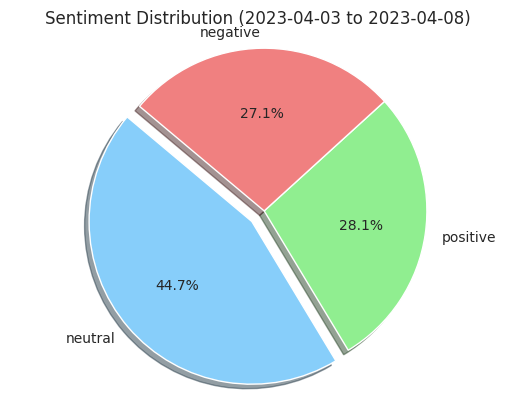

  0%|          | 0/4158 [00:00<?, ?it/s]

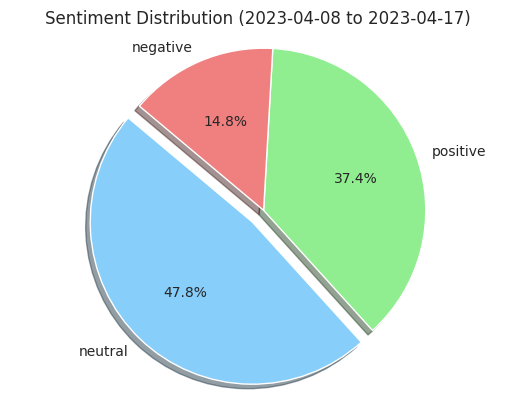

  0%|          | 0/3880 [00:00<?, ?it/s]

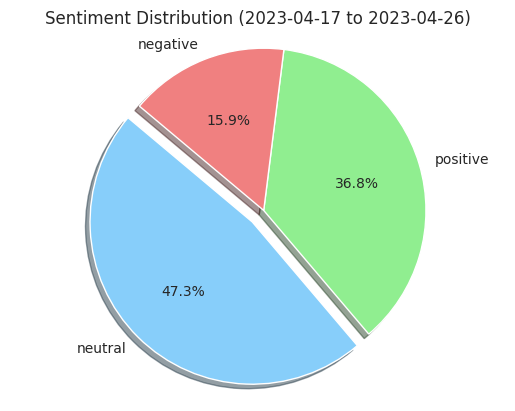

  0%|          | 0/4128 [00:00<?, ?it/s]

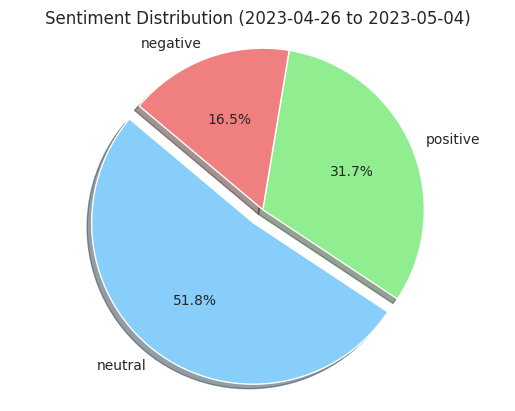

  0%|          | 0/3860 [00:00<?, ?it/s]

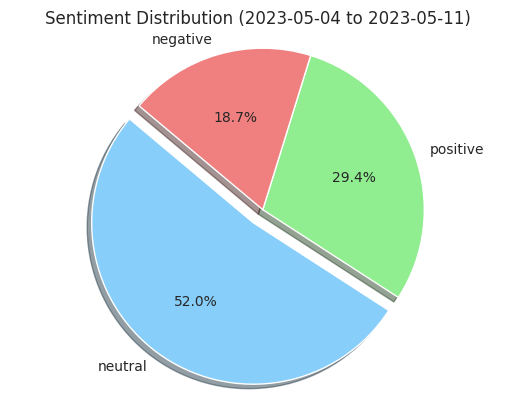

In [ ]:
import matplotlib.pyplot as plt

# Define the date ranges
date_ranges = [
    ('2023-04-03', '2023-04-08'),
    ('2023-04-08', '2023-04-17'),
    ('2023-04-17', '2023-04-26'),
    ('2023-04-26', '2023-05-04'),
    ('2023-05-04', '2023-05-11')
]

# Define the label_sentiment function
def label_sentiment(x):
    if x < -0.05:
        return 'negative'
    if x > 0.35:
        return 'positive'
    return 'neutral'

# Perform sentiment analysis on each date range and create pie chart
for start_date, end_date in date_ranges:
    date_range_data = data[(data['datetime'] >= start_date) & (data['datetime'] < end_date)]
    date_range_data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(date_range_data['text'])]
    date_range_data['overall_sentiment'] = date_range_data['sentiment'].apply(label_sentiment)

    sentiment_counts = date_range_data['overall_sentiment'].value_counts()

    # Create pie chart
    labels = sentiment_counts.index
    values = sentiment_counts.values
    explode = (0.1, 0, 0)
    colors = ['lightskyblue', 'lightgreen', 'lightcoral']
    plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f'Sentiment Distribution ({start_date} to {end_date})')
    plt.axis('equal')  # Equal aspect ratio
    plt.show()

  0%|          | 0/3685 [00:00<?, ?it/s]

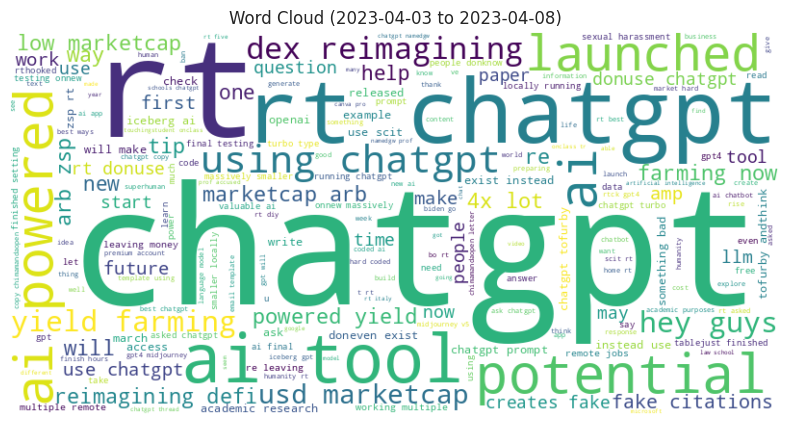

  0%|          | 0/4158 [00:00<?, ?it/s]

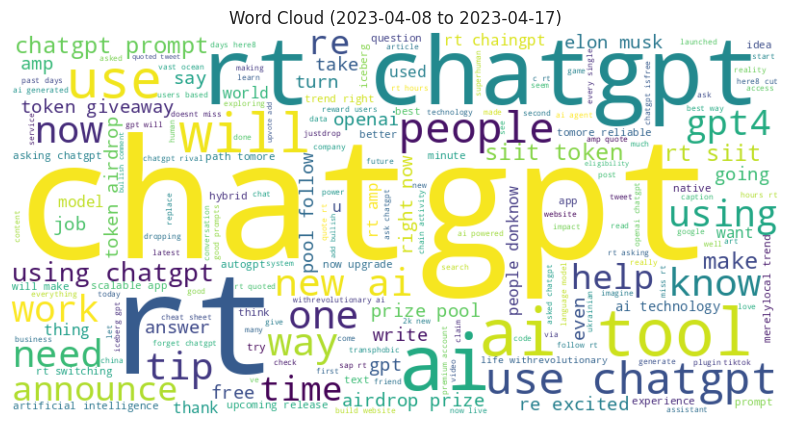

  0%|          | 0/3880 [00:00<?, ?it/s]

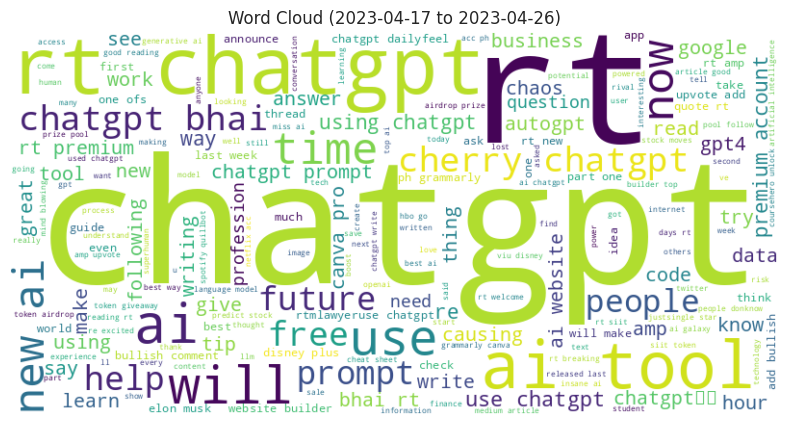

  0%|          | 0/4128 [00:00<?, ?it/s]

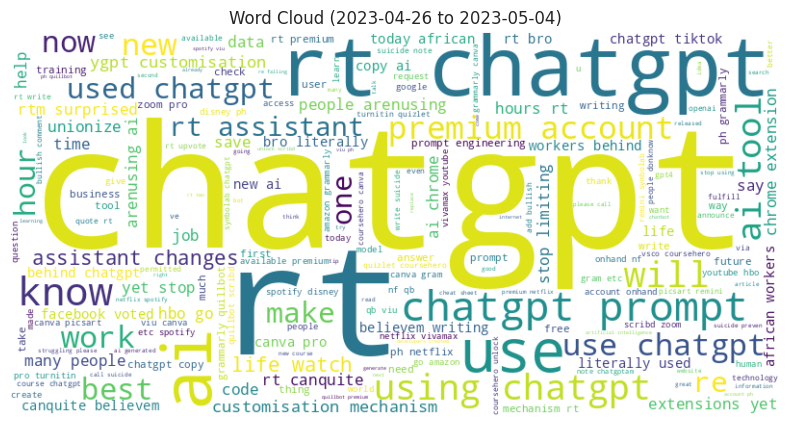

  0%|          | 0/3860 [00:00<?, ?it/s]

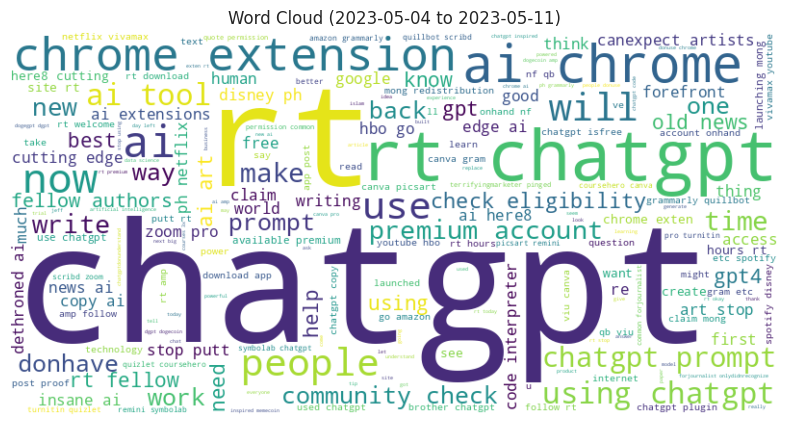

In [ ]:
from wordcloud import WordCloud

# Perform sentiment analysis on each date range
for start_date, end_date in date_ranges:
    date_range_data = data[(data['datetime'] >= start_date) & (data['datetime'] < end_date)]
    date_range_data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(date_range_data['text'])]
    date_range_data['overall_sentiment'] = date_range_data['sentiment'].apply(label_sentiment)

    # Combine all tweets in the date range into a single string
    text = ' '.join(date_range_data['text'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud ({start_date} to {end_date})')
    plt.axis('off')  # Hide axes and labels
    plt.show()


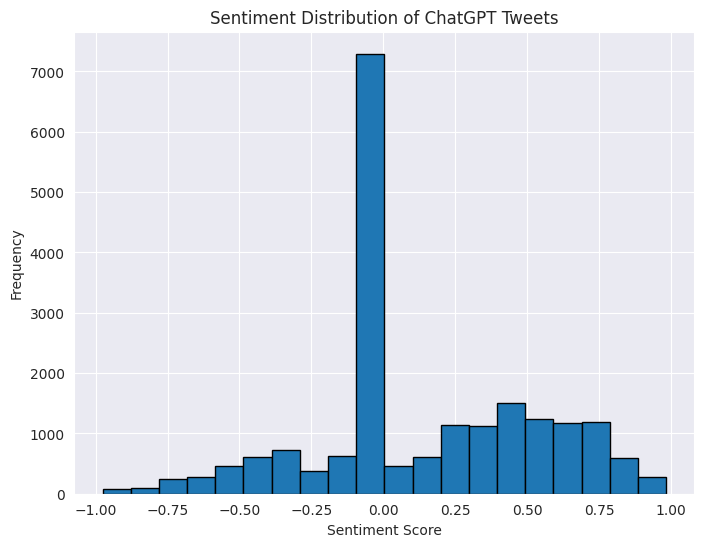

In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment scores for ChatGPT tweets
sentiment_scores = [sia.polarity_scores(tweet)['compound'] for tweet in data['text']]

# Create a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(sentiment_scores, bins=20, edgecolor='black')
plt.title('Sentiment Distribution of ChatGPT Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import pandas as pd

# Define the date ranges
date_ranges = [
    ('2023-04-03', '2023-04-08'),
    ('2023-04-08', '2023-04-17'),
    ('2023-04-17', '2023-04-26'),
    ('2023-04-26', '2023-05-04'),
    ('2023-05-04', '2023-05-11')
]

# Define the label_sentiment function
def label_sentiment(x):
    if x < -0.05:
        return 'negative'
    if x > 0.35:
        return 'positive'
    return 'neutral'

# Initialize a list to store the results
results = []

# Perform sentiment analysis on each date range
for start_date, end_date in date_ranges:
    date_range_data = data[(data['datetime'] >= start_date) & (data['datetime'] < end_date)]
    date_range_data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(date_range_data['text'])]
    date_range_data['overall_sentiment'] = date_range_data['sentiment'].apply(label_sentiment)

    # Calculate sentiment percentages
    sentiment_counts = date_range_data['overall_sentiment'].value_counts()
    total_tweets = len(date_range_data)
    sentiment_percentages = (sentiment_counts / total_tweets) * 100

    # Append results to the list
    results.append({
        'Start Date': start_date,
        'End Date': end_date,
        'Positive (%)': sentiment_percentages.get('positive', 0),
        'Neutral (%)': sentiment_percentages.get('neutral', 0),
        'Negative (%)': sentiment_percentages.get('negative', 0),
    })

# Create a pandas DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the table
print(results_df)


  0%|          | 0/3685 [00:00<?, ?it/s]

  0%|          | 0/4158 [00:00<?, ?it/s]

  0%|          | 0/3880 [00:00<?, ?it/s]

  0%|          | 0/4128 [00:00<?, ?it/s]

  0%|          | 0/3860 [00:00<?, ?it/s]

   Start Date    End Date  Positive (%)  Neutral (%)  Negative (%)
0  2023-04-03  2023-04-08     28.113976    44.748982     27.137042
1  2023-04-08  2023-04-17     37.373737    47.835498     14.790765
2  2023-04-17  2023-04-26     36.804124    47.319588     15.876289
3  2023-04-26  2023-05-04     31.710271    51.792636     16.497093
4  2023-05-04  2023-05-11     29.352332    51.968912     18.678756


In [ ]:
unique_locations_sorted = data['user_location'].value_counts().sort_values(ascending=False)
print(unique_locations_sorted)

United States                   136
India                           102
London, England                  76
Lagos, Nigeria                   76
日本                               75
                               ... 
徳島県                               1
with Jermaine Lamar Cole.         1
Mayur Vihar Ph 1 Extn, Delhi      1
Cirebon, Jawa Barat               1
London UK                         1
Name: user_location, Length: 6634, dtype: int64


In [ ]:
unique_locations_count = data['user_location'].nunique()
print(unique_locations_count)

6634


In [ ]:
# Assuming you have already calculated unique_locations_sorted using data['user_location'].value_counts().sort_values(ascending=False)

# Print top 10 values
print(unique_locations_sorted.head(10))

United States      136
India              102
London, England     76
Lagos, Nigeria      76
日本                  75
Los Angeles, CA     62
World Wide Web      59
Nigeria             58
Indonesia           55
USA                 54
Name: user_location, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Set the font family to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

  0%|          | 0/136 [00:00<?, ?it/s]

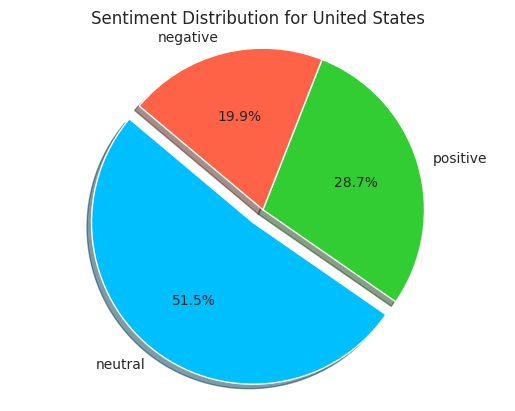

  0%|          | 0/102 [00:00<?, ?it/s]

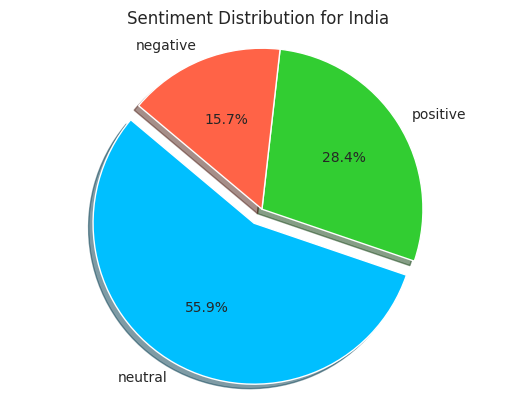

  0%|          | 0/76 [00:00<?, ?it/s]

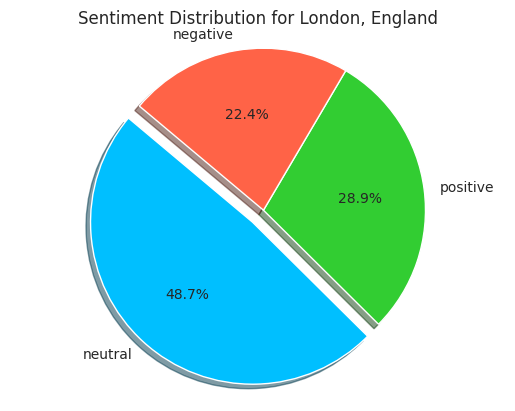

  0%|          | 0/76 [00:00<?, ?it/s]

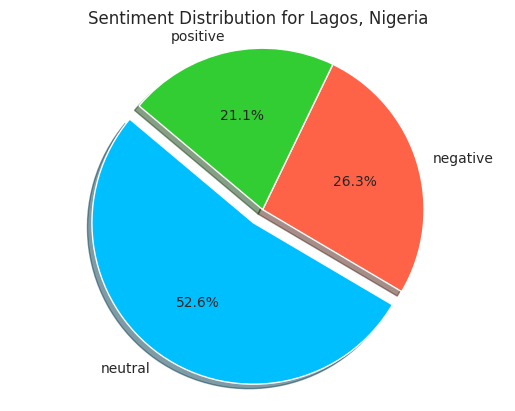

In [ ]:
user_locations = ['United States', 'India', 'London, England', 'Lagos, Nigeria']

sentiment_colors = {
    'positive': 'limegreen',
    'neutral': 'deepskyblue',
    'negative': 'tomato'
}

for location in user_locations:
    location_data = data[data['user_location'] == location]
    location_data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(location_data['text'])]
    location_data['overall_sentiment'] = location_data['sentiment'].apply(label_sentiment)

    sentiment_counts = location_data['overall_sentiment'].value_counts()

    # Create pie chart
    labels = sentiment_counts.index
    values = sentiment_counts.values
    explode = (0.1, 0, 0)  # Optional: To explode a particular slice, adjust the values here
    colors = [sentiment_colors[sentiment] for sentiment in labels]  # Use the sentiment_colors dictionary
    plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f'Sentiment Distribution for {location}')
    plt.axis('equal')  # Equal aspect ratio ensures circular pie chart
    plt.show()

# Display the pie charts for each location
plt.show()


In [ ]:
import pandas as pd

# Define the user locations
user_locations = ['United States', 'India', 'London, England', 'Lagos, Nigeria']

# Create an empty list to store the results
sentiment_results = []

# Perform sentiment analysis for each user location
for location in user_locations:
    location_data = data[data['user_location'] == location]
    location_data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(location_data['text'])]
    location_data['overall_sentiment'] = location_data['sentiment'].apply(label_sentiment)

    sentiment_counts = location_data['overall_sentiment'].value_counts(normalize=True) * 100

    # Append the results to the list
    sentiment_results.append({
        'User Location': location,
        'Positive (%)': sentiment_counts.get('positive', 0),
        'Neutral (%)': sentiment_counts.get('neutral', 0),
        'Negative (%)': sentiment_counts.get('negative', 0)
    })

# Create a DataFrame from the results list
sentiment_df = pd.DataFrame(sentiment_results)

# Display the DataFrame
print(sentiment_df)


  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

     User Location  Positive (%)  Neutral (%)  Negative (%)
0    United States     28.676471    51.470588     19.852941
1            India     28.431373    55.882353     15.686275
2  London, England     28.947368    48.684211     22.368421
3   Lagos, Nigeria     21.052632    52.631579     26.315789


  0%|          | 0/136 [00:00<?, ?it/s]

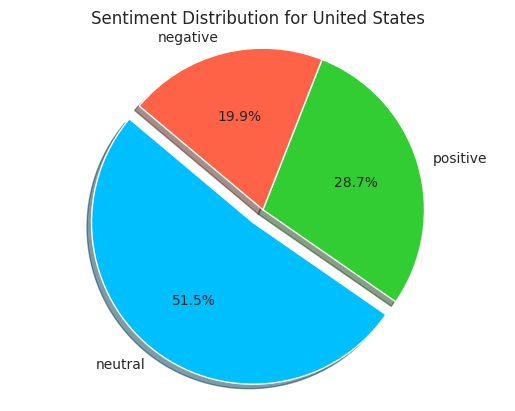

  0%|          | 0/102 [00:00<?, ?it/s]

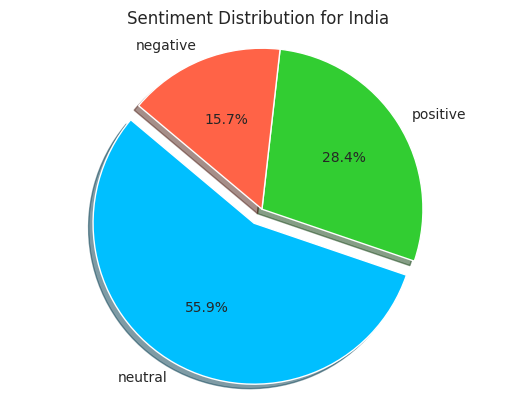

  0%|          | 0/76 [00:00<?, ?it/s]

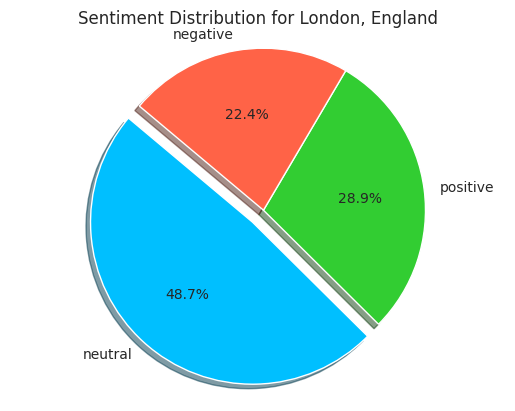

  0%|          | 0/76 [00:00<?, ?it/s]

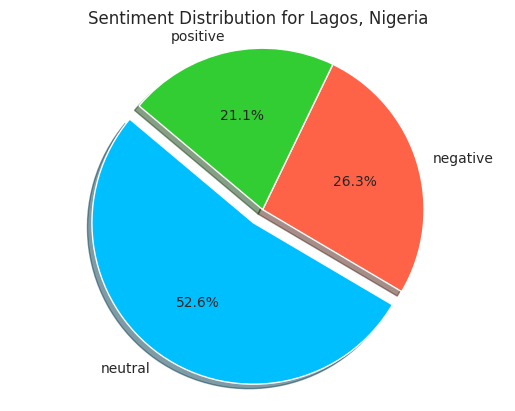

In [ ]:
user_locations = ['United States', 'India', 'London, England', 'Lagos, Nigeria']

sentiment_colors = {
    'positive': 'limegreen',
    'neutral': 'deepskyblue',
    'negative': 'tomato'
}

for location in user_locations:
    location_data = data[data['user_location'] == location]
    location_data['sentiment'] = [sia.polarity_scores(x)['compound'] for x in tqdm(location_data['text'])]
    location_data['overall_sentiment'] = location_data['sentiment'].apply(label_sentiment)

    sentiment_counts = location_data['overall_sentiment'].value_counts()

    # Create pie chart
    labels = sentiment_counts.index
    values = sentiment_counts.values
    explode = (0.1, 0, 0)  # Optional: To explode a particular slice, adjust the values here
    colors = [sentiment_colors[sentiment] for sentiment in labels]  # Use the sentiment_colors dictionary
    plt.pie(values, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title(f'Sentiment Distribution for {location}')
    plt.axis('equal')  # Equal aspect ratio ensures circular pie chart
    plt.show()